In [1]:
import torch
from boardGPT.utils import load_safetensors
from IPython.display import HTML

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = load_safetensors("../out/safetensors/model.safetensors", "../out/safetensors/config.json")
model = model.to(device)

Loading weights from safetensors file: ../out/safetensors/model.safetensors
Successfully loaded weights from ../out/safetensors/model.safetensors


In [3]:
moves = model.generate_moves(
    sequence=['c4', 'c3'],
    max_new_tokens=10,
    device=device
)

move_idx: cuda:0


In [4]:
from boardGPT.utils import verify_game
verify_game(moves)

(True, [])

/home/schaetti/Projets/CODING/boardGPT/boardGPT/utils/viz.py:525: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


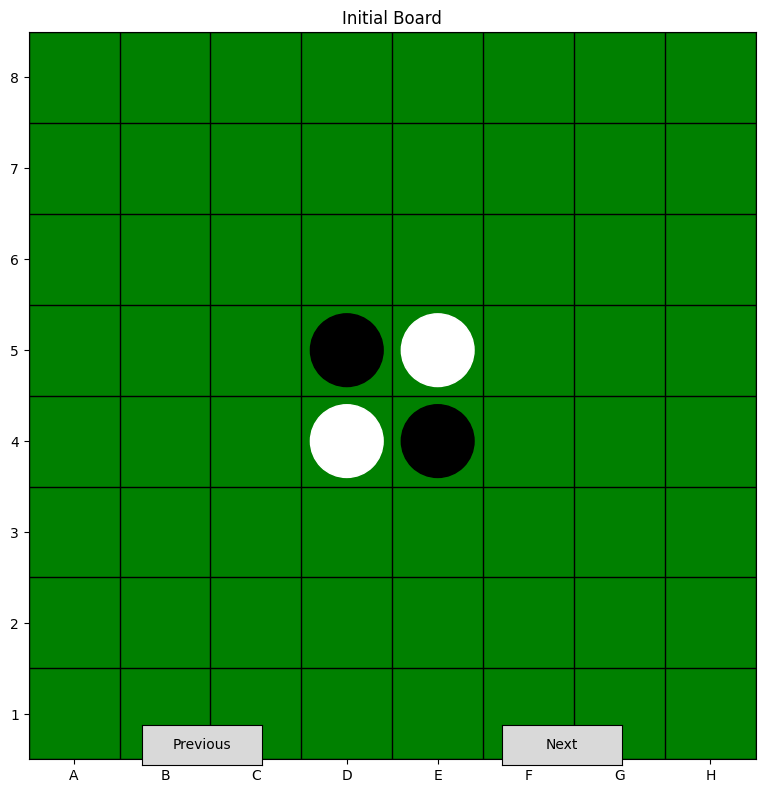

In [5]:
from boardGPT.utils import plot_othello_game
ani = plot_othello_game(moves)
HTML(ani.to_jshtml())

In [8]:
from boardGPT.validation import invalid_move_rate
error_rate = invalid_move_rate(
    model=model,
    data_dir="../data/othello/othello-synthetic",
    split="val",
    data_filename="",
    num_samples=10,
    device=device
)

Loading val data into memory...
Found 38 bin files for val split
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_17.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_21.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_31.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_38.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_22.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_24.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_13.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_28.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_5.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_15.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_35.bin...
Loading ../data/othello/othello-synthetic/val/othello-synthetic-val_25.bin...


In [9]:
error_rate * 100.0

0.0

/home/schaetti/Projets/CODING/boardGPT/boardGPT/utils/viz.py:525: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


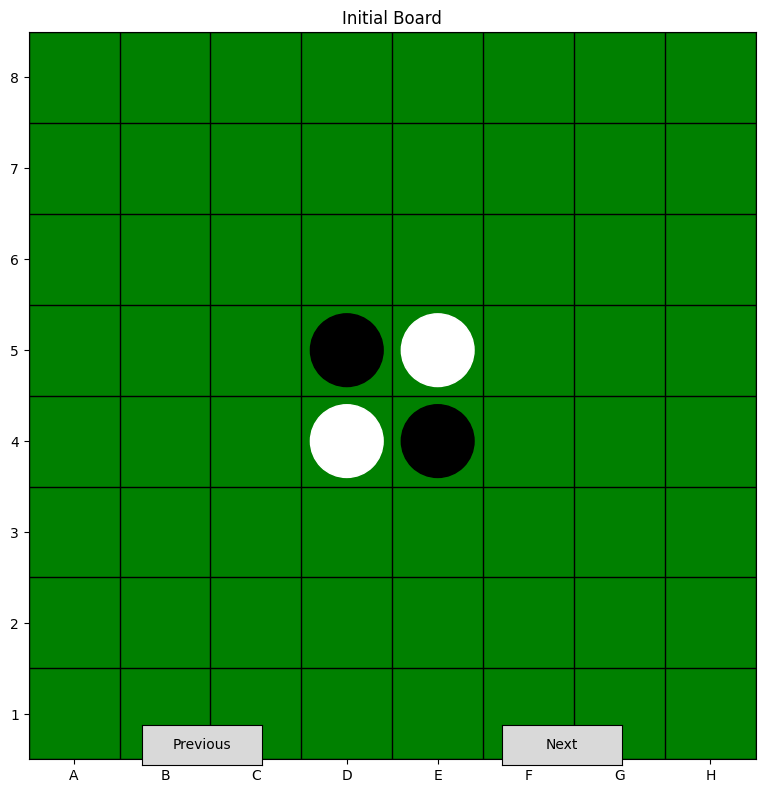

In [10]:
ani = plot_othello_game(['d7', 'c7', 'b7', 'e7', 'f7', 'f8', 'c6', 'a8', 'e3', 'e2', 'c5', 'b6', 'e8', 'g8', 'g7', 'h8', 'c1', 'g4', 'g5', 'b4'])
HTML(ani.to_jshtml())